In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn as sklearn
%matplotlib inline

In [19]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t')

# Background
In this challenge I will build a Naive Bayes classifier to perform sentiment analysis on Amazon reviews looking for positive reviews. I will then see if the classifier translates well to another dataset. In this case, a dataset of Yelp reviews. 

This dataset was created for the Paper \"From Group to Individual Labels using Deep Features\", Kotzias et. al., KDD 2015. https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [20]:
# Change the column names and look for words that could be used in our sentiment analysis to find positive reviews
amazon.columns = ['reviews', 'positive']
amazon['positive'] = (amazon['positive'] == 1)
amazon.head(50)

,reviews,positive
0,"Good case, Excellent value.",True
1,Great for the jawbone.,True
2,Tied to charger for conversations lasting more...,False
3,The mic is great.,True
4,I have to jiggle the plug to get it to line up...,False
5,If you have several dozen or several hundred c...,False
6,If you are Razr owner...you must have this!,True
7,"Needless to say, I wasted my money.",False
8,What a waste of money and time!.,False
9,And the sound quality is great.,True


In [28]:
#Based on these reviews and some educated guesses, I have chosen the following 9 words that would appear in positive 
# reviews
keywords = ['good', 'great', 'best', 'awesome', 'fantastic', 'impressive', 'exceptional', 'excellent', 'nice']

for key in keywords:
    amazon[str(key)] = amazon.reviews.str.contains(
       ' ' + str(key) + ' ',
        case=False
    )

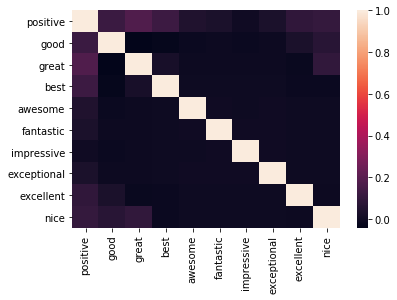

In [23]:
#Check to see if the words are correlated
sns.heatmap(amazon.corr())

Now that we have chosen keywords and discovered that they show a strong independence from each other let's proceed.

In [7]:
data = amazon[keywords]
target = amazon['positive']

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("The number of positive reviews out of {} total reviews is {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

The number of positive reviews out of 999 total reviews is 412


That worked pretty well. Now let's try the filter on Yelp Reviews.

In [9]:
yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t')

yelp.columns = ['reviews', 'positive']
yelp['positive'] = (yelp['positive'] == 1)

In [10]:
yelp.head(50)

,reviews,positive
0,Crust is not good.,False
1,Not tasty and the texture was just nasty.,False
2,Stopped by during the late May bank holiday of...,True
3,The selection on the menu was great and so wer...,True
4,Now I am getting angry and I want my damn pho.,False
5,Honeslty it didn't taste THAT fresh.),False
6,The potatoes were like rubber and you could te...,False
7,The fries were great too.,True
8,A great touch.,True
9,Service was very prompt.,True


Under different circumstances I would probably change the keywords because Food reviews and Product reviews are very different. But let's see how well the filter works for the Yelp reviews.

In [24]:
keywords = ['good', 'great', 'best', 'awesome', 'fantastic', 'impressive', 'exceptional', 'excellent', 'nice']

for key in keywords:
    yelp[str(key)] = yelp.reviews.str.contains(
       ' ' + str(key) + ' ',
        case=False
    )

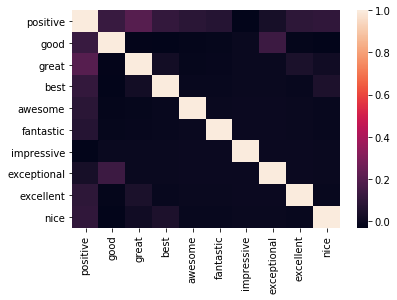

In [25]:
sns.heatmap(yelp.corr())

In [26]:
data = yelp[keywords]
target = yelp['positive']

In [27]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("The number of positive reviews out of {} total reviews is {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

The number of positive reviews out of 999 total reviews is 391


The positive review filter worked very well. However, I think a negative review filter would not work the same for Amazon and Yelp reviews.